### What's In This Notebook:

##### 1. Data Preparation for NLP
##### 2. Adding Features for NLP Analysis
##### 3. EDA - 1980 - 2025
##### 4. EDA - 1980 - 1990
##### 5. EDA - 1990 - 2000
##### 6. EDA - 2000 - 2010
##### 7. EDA - 2010 - 2020
##### 8. EDA - 2020 - 2025





# Data Preparation for NLP

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)


import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
df = pd.read_csv(r"C:\Users\Sahm9\Work\Digital_Futures\Capstone\src\ufo_report_all_data_final_with_extra_features.csv")

In [6]:
df.head()

,Date,Time,Town / Village,County,Occupation of reporter,Brief Description of sighting,overall_emotion,experience_overall,sentiment_score
0,02/01/1997 00:00,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714
1,02/01/1997 00:00,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667
2,03/01/1997 00:00,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385
3,04/01/1997 00:00,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500
4,13/01/1997 00:00,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000


In [7]:
df.shape

(6006, 9)

In [8]:
df.dtypes

Date                              object
Time                              object
Town / Village                    object
County                            object
Occupation of reporter            object
Brief Description of sighting     object
overall_emotion                   object
experience_overall                object
sentiment_score                  float64
dtype: object

In [9]:
df.isnull().sum()

Date                               21
Time                              124
Town / Village                      0
County                           1152
Occupation of reporter           5940
Brief Description of sighting       0
overall_emotion                     0
experience_overall                  0
sentiment_score                     0
dtype: int64

In [10]:
df.dropna(subset=['Date', 'Time', 'Town / Village'], inplace=True)

In [11]:
df.isnull().sum()

Date                                0
Time                                0
Town / Village                      0
County                           1150
Occupation of reporter           5816
Brief Description of sighting       0
overall_emotion                     0
experience_overall                  0
sentiment_score                     0
dtype: int64

In [12]:
df.shape

(5877, 9)

In [13]:
df.rename(columns={'Town / Village': 'City', 'Brief Description of sighting':'Sighting','Occupation of reporter':'Reporter_Occupation'}, inplace=True)

In [14]:
df.tail()

,Date,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score
6001,01/06/1980 00:00,09:00:00,Plymouth,Devon,NaN,"hello there.i live in plymouth,devon in the south west of england,where this sighting occured.it was a long time ago,around 1980, that",anticipation,Negative,0.000000
6002,04/04/1980 00:00,22:00:00,LeamingtonSpa,NaN,NaN,"for steeling, it was approx 12 to 15 feet high and was pure light shaped like a square armed and legged robot,",anger,Positive,0.041667
6003,01/03/1980 00:00,19:35:00,Maldon,Essex,NaN,a flap opened on the craft and beings walked out,anger,Negative,0.100000
6004,06/02/1980 00:00,20:22:00,Derby,Derbyshire,NaN,"walking north in a quiet town street,with my wife, i glanced over my right shoulder and saw an object flying across the dark sky. i cri",sadness,Positive,0.100000
6005,10/01/1980 00:00,21:00:00,Bletchley,Buckinghamshire,NaN,a very bright orb/sphere decended down and hovered right in front of us and it also made a loud humming noise,anger,Negative,0.000000


In [15]:
df['Date'] = pd.to_datetime(df['Date'], format = 'mixed', dayfirst=True, errors='coerce')

In [16]:
df.head()

,Date,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score
0,1997-01-02,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714
1,1997-01-02,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667
2,1997-01-03,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385
3,1997-01-04,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500
4,1997-01-13,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000


In [17]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S', errors='coerce').dt.time

In [18]:
df.head()

,Date,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score
0,1997-01-02,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714
1,1997-01-02,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667
2,1997-01-03,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385
3,1997-01-04,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500
4,1997-01-13,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000


In [19]:
df['Year'] = df['Date'].dt.year

In [20]:
df['Month'] = df['Date'].dt.month

In [21]:
df['Day'] = df['Date'].dt.day

In [22]:
df.head()

,Date,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score,Year,Month,Day
0,1997-01-02,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714,1997,1,2
1,1997-01-02,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667,1997,1,2
2,1997-01-03,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385,1997,1,3
3,1997-01-04,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500,1997,1,4
4,1997-01-13,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000,1997,1,13


In [24]:
df = df[['Date', 'Day', 'Month', 'Year', 'Time', 'City', 'County', 'Reporter_Occupation', 'Sighting', 'overall_emotion', 'experience_overall', 'sentiment_score']]

In [25]:
df.head()

,Date,Day,Month,Year,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score
0,1997-01-02,2,1,1997,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714
1,1997-01-02,2,1,1997,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667
2,1997-01-03,3,1,1997,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385
3,1997-01-04,4,1,1997,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500
4,1997-01-13,13,1,1997,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000


# Adding Features for NLP Analysis

In [26]:
# Connectors and assets
import requests # asks website for permission to connect it and do stuff with its data
from PIL import Image # to view images in notebook
import urllib.request 
from gensim.corpora import Dictionary # really powerful NLP language with dictionary of english words for TF-IDF
from os import path, getcwd

#
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, ImageColorGenerator

# Different NLP tools from NL tokeniser 
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

# Creating emotions from text
from LeXmo import LeXmo as lex

import swifter
from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahm9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [27]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahm9\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sahm9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Sahm9\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [28]:
df['Sighting'] = df['Sighting'].apply(str.lower)

In [29]:
df['Sighting_Tokenised'] = df['Sighting'].apply(word_tokenize)

In [30]:
df.head()

,Date,Day,Month,Year,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score,Sighting_Tokenised
0,1997-01-02,2,1,1997,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714,"[a, large, ufo, ,, with, all, different, colour, of, lights, around, it, ., was, stationary, for, some, time, ,, then, started, moving, ,, making, small, erratic, movements, .]"
1,1997-01-02,2,1,1997,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667,"[an, object, that, is, continually, changing, colour, ., normal, star, shape, .]"
2,1997-01-03,3,1,1997,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385,"[an, oval, ,, cigar, shaped, object, ., when, the, object, speeded, up, ,, the, witness, could, see, red, and, white, lights, around, or, underneath, it, .]"
3,1997-01-04,4,1,1997,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500,"[there, were, circular, lights, that, were, indistinct, ., the, object, was, continually, orbiting, and, tilting, .]"
4,1997-01-13,13,1,1997,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000,"[one, ,, north, star, sized, object, ., red, and, green, colours, ,, brighter, than, a, star, ., was, moving, from, west, to, north, .]"


In [31]:
#stopwords

stopwords = nltk.corpus.stopwords.words('english')
punctuation = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''
punctuation = [x for x in punctuation]
stopwords.extend(punctuation)

<>:4: SyntaxWarning: invalid escape sequence '\]'
<>:4: SyntaxWarning: invalid escape sequence '\]'
C:\Users\Sahm9\AppData\Local\Temp\ipykernel_19620\3969350218.py:4: SyntaxWarning: invalid escape sequence '\]'
  punctuation = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''


In [32]:
df['Sighting_Tokenised'] = df['Sighting_Tokenised'].apply(lambda x:[words for words in x if words not in stopwords])

In [33]:
df.head()

,Date,Day,Month,Year,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score,Sighting_Tokenised
0,1997-01-02,2,1,1997,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714,"[large, ufo, different, colour, lights, around, stationary, time, started, moving, making, small, erratic, movements]"
1,1997-01-02,2,1,1997,23:35:00,Scunthorpe,North Lincolnshire,NaN,an object that is continually changing colour. normal star shape.,anticipation,Positive,0.166667,"[object, continually, changing, colour, normal, star, shape]"
2,1997-01-03,3,1,1997,07:45:00,Formby/Liverpool,Merseyside,NaN,"an oval, cigar shaped object. when the object speeded up, the witness could see red and white lights around or underneath it.",anticipation,Positive,0.115385,"[oval, cigar, shaped, object, object, speeded, witness, could, see, red, white, lights, around, underneath]"
3,1997-01-04,4,1,1997,23:20:00,Beith,Ayrshire,NaN,there were circular lights that were indistinct. the object was continually orbiting and tilting.,anger,Negative,0.062500,"[circular, lights, indistinct, object, continually, orbiting, tilting]"
4,1997-01-13,13,1,1997,21:00:00,Brockton,Staffordshire,NaN,"one, north star sized object. red and green colours, brighter than a star. was moving from west to north.",joy,Positive,0.125000,"[one, north, star, sized, object, red, green, colours, brighter, star, moving, west, north]"


In [34]:
# unwanted words

unwanted_words = ['ufo', 'like', 'saw', 'lights', 'shape', 'shaped', 'object', 'objects', 'seen', 'craft', 'light', 'sky', 'see', 'making', '\'s', '\n', '\\']

In [35]:
df['Sighting_Tokenised'] = df['Sighting_Tokenised'].apply(lambda x:[words for words in x if words not in unwanted_words])

In [36]:
text = "Today is a good day"
print(lex.LeXmo(text))

{'text': 'Today is a good day', 'anger': 0.0, 'anticipation': 0.2, 'disgust': 0.0, 'fear': 0.0, 'joy': 0.2, 'negative': 0.0, 'positive': 0.2, 'sadness': 0.0, 'surprise': 0.2, 'trust': 0.2}


In [37]:
def get_sentiment_feeling(sighting):
    
    all_emotions = lex.LeXmo(sighting)
    return 'Positive' if all_emotions['positive'] > all_emotions['negative'] else 'Negative'

In [38]:
get_sentiment_feeling(text)

'Positive'

In [39]:
def get_sentiment_score(sighting):
    
    all_emotions = lex.LeXmo(sighting)
    sentiment_score = max(all_emotions['positive'], all_emotions['negative'])

    return sentiment_score

In [40]:
get_sentiment_score(text)

0.2

In [41]:
def get_emotion(sighting):
    
    all_emotions = lex.LeXmo(sighting)
    all_emotions.pop('text', None)
    all_emotions.pop('positive', None)
    all_emotions.pop('negative', None)
    all_emotions.pop('trust', None)

    return max(all_emotions, key=all_emotions.get, default = None)

In [42]:
get_emotion(text)

'anticipation'

In [43]:
colors_list = ['red', 'green', 'blue', 'yellow', 'orange', 'silver', 'black', 'purple', 'white', 'gray']
def get_color_list(sighting):
    return str(next((color for color in colors_list if color in sighting), "No color given"))

In [44]:
get_color_list(['red', 'green'])      

'red'

In [45]:
shapes_list = ['triangle', 'circular', 'sphere' 'oval', 'ball', 'orb', 'circle', 'square', 'rectangular', 'disc', 'saucer', 'star', 'round', 'cigar', 'stick', 'oval']
def get_shapes_list(sighting):
    return str(next((shape for shape in shapes_list if shape in sighting), "No shape described"))

In [46]:
get_shapes_list(['triangle', 'disc', 'kite'])

'triangle'

In [47]:
movement_types = ['fast', 'slow', 'moving', 'flying', 'stationary', 'flashing', 'formation', 'slowly', 'hovering'] 
def get_movement_types_list(sighting):
    return str(next((move for move in movement_types if move in sighting), "No description given"))

In [48]:
get_movement_types_list(['fast', 'slow', 'fly'])     

'fast'

In [49]:
size_list = ['small', 'big', 'large', 'tiny', 'mediumly', 'larger', 'smaller'] 
def get_size_list(sighting):
    return str(next((size for size in size_list if size in sighting), "No size given"))

In [50]:
get_size_list(['small', 'slow', 'tiny'])     

'small'

In [51]:
quantity_list = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '8-10', 'seventeen', '17']
def get_quantity_list(sighting):
    return str(next((num for num in quantity_list if num in sighting), "No description given"))

In [52]:
get_quantity_list(['one', 'two', 'tiny'])

'one'

In [53]:
# Getting color observed from each sighting

tqdm.pandas()
df['ufo_colors'] = df['Sighting_Tokenised'].progress_apply(get_color_list)

100%|██████████| 5877/5877 [00:00<00:00, 565417.12it/s]


In [54]:
# Getting shapes seen from each sighting

tqdm.pandas()
df['ufo_shapes'] = df['Sighting_Tokenised'].progress_apply(get_shapes_list)

100%|██████████| 5877/5877 [00:00<00:00, 331432.01it/s]


In [55]:
# Getting movevment descriptions from each sighting

tqdm.pandas()
df['ufo_movement_types'] = df['Sighting_Tokenised'].progress_apply(get_movement_types_list)

100%|██████████| 5877/5877 [00:00<00:00, 263432.70it/s]


In [56]:
# Getting size of ufo observed from each sighting

tqdm.pandas()
df['ufo_sizes'] = df['Sighting_Tokenised'].progress_apply(get_size_list)

100%|██████████| 5877/5877 [00:00<00:00, 356862.56it/s]


In [57]:
# Getting quantity of ufos seen during each sighting

tqdm.pandas()
df['number_of_ufos'] = df['Sighting_Tokenised'].progress_apply(get_quantity_list)

100%|██████████| 5877/5877 [00:00<00:00, 221258.12it/s]


In [ ]:
# Finding out if each experience felt positive or negative

# tqdm.pandas()
# df['experience_overall'] = df['Sighting'].progress_apply(get_sentiment_feeling)

In [ ]:
# How positive or negative each sighting felt

# tqdm.pandas()
# df['sentiment_score'] = df['Sighting'].progress_apply(get_sentiment_score)

In [ ]:
# Getting the major emotion felt during each sighting

# tqdm.pandas()
# df['overall_emotion'] = df['Sighting'].progress_apply(get_emotion)

In [75]:
df.head(1)

,Date,Day,Month,Year,Time,City,County,Reporter_Occupation,Sighting,overall_emotion,experience_overall,sentiment_score,Sighting_Tokenised,ufo_colors,ufo_shapes,ufo_movement_types,ufo_sizes,number_of_ufos
0,1997-01-02,2,1,1997,20:58:00,Immingham,Lincolnshire,NaN,"a large ufo, with all different colour of lights around it. was stationary for some time, then started moving, making small erratic movements.",anticipation,Negative,0.035714,"[large, different, colour, around, stationary, time, started, moving, small, erratic, movements]",No color given,No shape described,moving,small,No description given


# EDA - All Years (1980-2025)

In [76]:
my_terms = Dictionary(documents = df['Sighting_Tokenised'])
word_sightings_value_dictionary = {}

#
for k, v in my_terms.cfs.items():
    if v > 100:
        word_sightings_value_dictionary[my_terms[k]] = v

In [82]:
word_sightings_value_dictionary

{'large': 384,
 'colour': 289,
 'around': 181,
 'stationary': 162,
 'moving': 938,
 'small': 174,
 'star': 318,
 'oval': 105,
 'red': 611,
 'white': 808,
 'circular': 198,
 'one': 804,
 'north': 216,
 'green': 302,
 'west': 220,
 'high': 236,
 'slowly': 222,
 'plane': 105,
 'moved': 368,
 'appeared': 171,
 'two': 551,
 'bright': 1356,
 'three': 299,
 'hovering': 180,
 'round': 269,
 'big': 107,
 'house': 106,
 'sound': 204,
 'orange': 807,
 'five': 112,
 'disappeared': 231,
 'direction': 156,
 'triangular': 182,
 'formation': 238,
 'speed': 274,
 'triangle': 190,
 'stars': 104,
 'flashing': 285,
 'went': 112,
 'flying': 318,
 'away': 135,
 'blue': 238,
 'fast': 372,
 'made': 126,
 'glowing': 148,
 'yellow': 147,
 'looked': 310,
 'across': 283,
 'back': 115,
 'low': 160,
 'minutes': 140,
 'towards': 104,
 'left': 113,
 'sphere': 110,
 'straight': 132,
 'line': 165,
 'silver': 162,
 'noise': 155,
 'strange': 191,
 'east': 244,
 'black': 202,
 'side': 147,
 'aircraft': 168,
 'size': 177,


In [78]:
ufo_mask = np.array(Image.open(r"C:\Users\Sahm9\Work\Digital_Futures\Capstone\src\ufo_clear.jpg"))

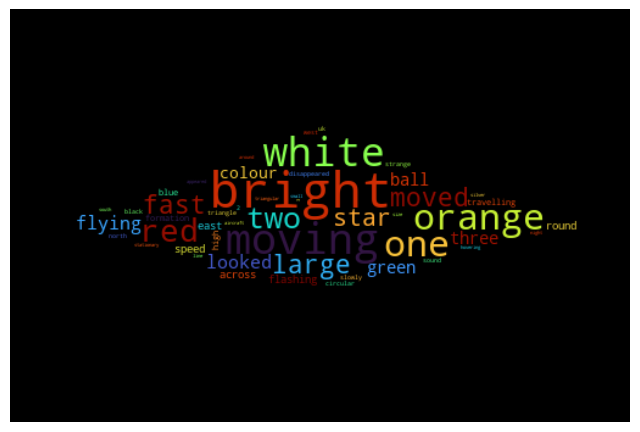

In [79]:
wc_all_years = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(word_sightings_value_dictionary)
plt.figure(figsize=(8,8))
plt.imshow(wc_all_years, interpolation="bilinear")
plt.axis("off")
plt.show()

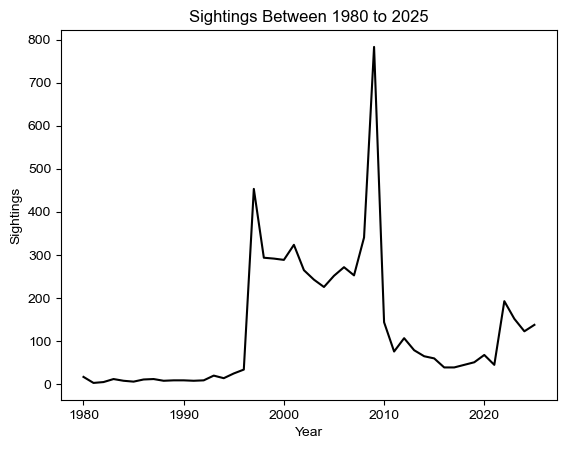

In [83]:
sightings_1980_2025 = df.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_1980_2025, x='Year', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Sightings Between 1980 to 2025')
plt.show()

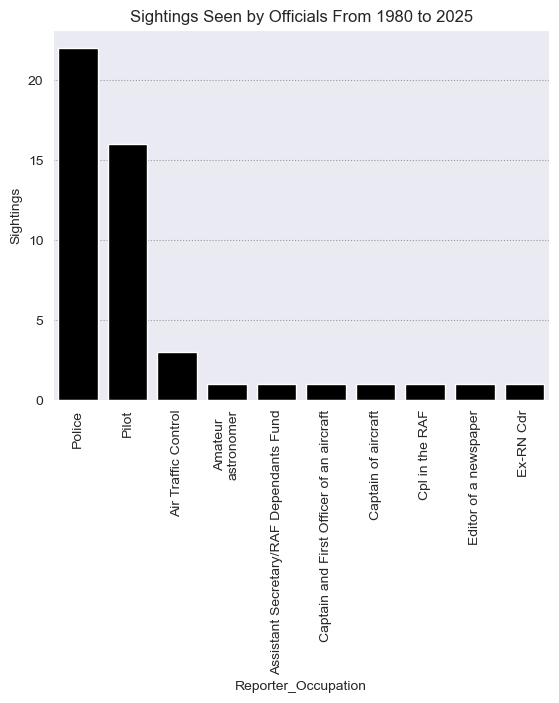

In [84]:
sightings_by_occupation_1980_2025 = df.groupby('Reporter_Occupation').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_occupation_1980_2025.nlargest(10, 'Sightings'), x='Reporter_Occupation', y='Sightings', color='black')
plt.xticks(rotation = 90)
plt.title('Sightings Seen by Officials From 1980 to 2025')
plt.show()

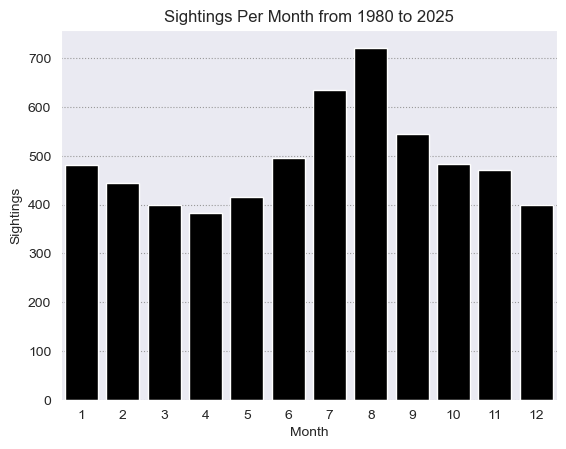

In [85]:
sightings_by_month_1989_2025 = df.groupby('Month').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1989_2025.nlargest(12, 'Sightings'), x='Month', y='Sightings', color='black')
plt.title('Sightings Per Month from 1980 to 2025')
plt.show()

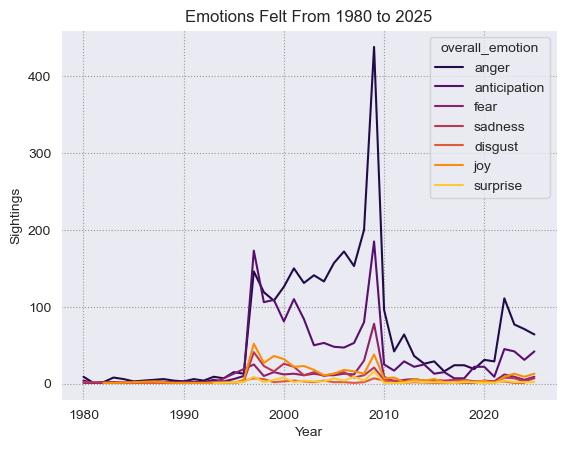

In [86]:
emotions_felt_1980_2025 = df.groupby(['Year', 'overall_emotion']).size().reset_index(name='Sightings')
sns.lineplot(data=emotions_felt_1980_2025, x='Year', y='Sightings', color='black', hue='overall_emotion', palette='inferno')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Emotions Felt From 1980 to 2025')
plt.show()

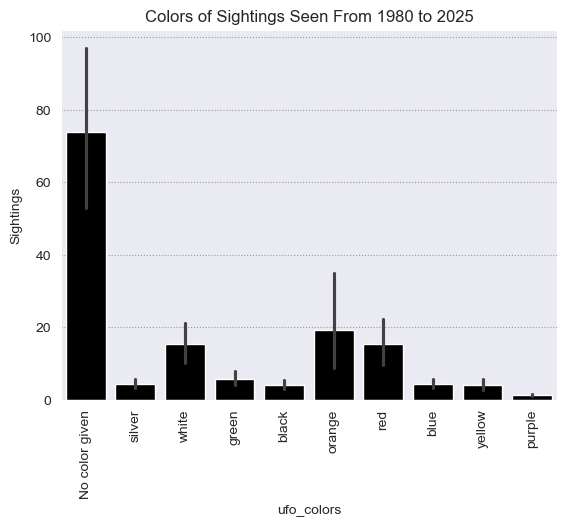

In [87]:
colors_seen_1980_2025 = df.groupby(['Year', 'ufo_colors']).size().reset_index(name='Sightings')
sns.barplot(data=colors_seen_1980_2025, x='ufo_colors', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Colors of Sightings Seen From 1980 to 2025')
plt.xticks(rotation=90)
plt.show()

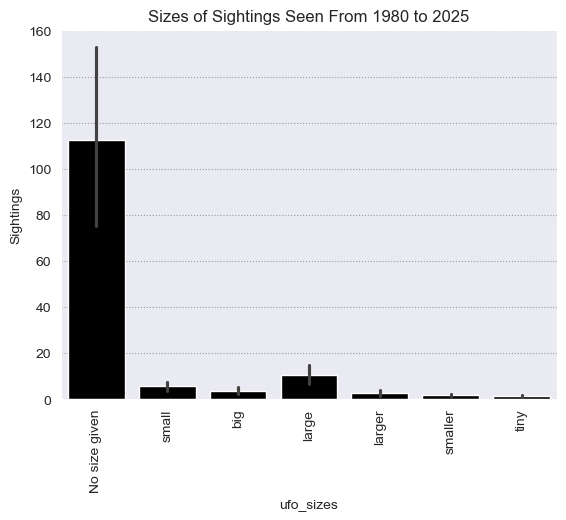

In [88]:
sizes_seen_1980_2025 = df.groupby(['Year', 'ufo_sizes']).size().reset_index(name='Sightings')
sns.barplot(data=sizes_seen_1980_2025, x='ufo_sizes', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Sizes of Sightings Seen From 1980 to 2025')
plt.xticks(rotation=90)
plt.show()

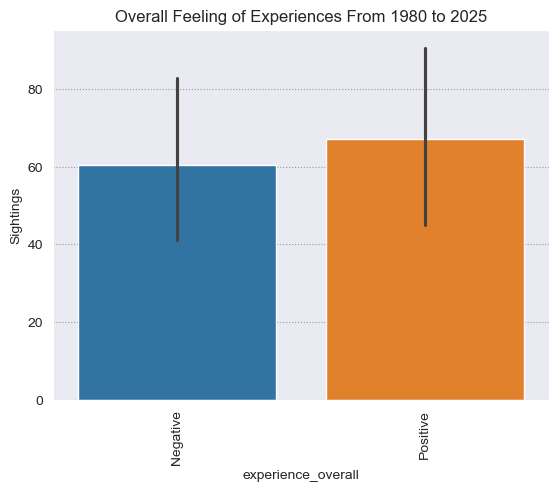

In [89]:
experiences_felt_1980_2025 = df.groupby(['Year', 'experience_overall']).size().reset_index(name='Sightings')
sns.barplot(data=experiences_felt_1980_2025, x='experience_overall', y='Sightings', hue='experience_overall')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Overall Feeling of Experiences From 1980 to 2025')
plt.xticks(rotation=90)
plt.show()

# EDA - 1980 to 1990

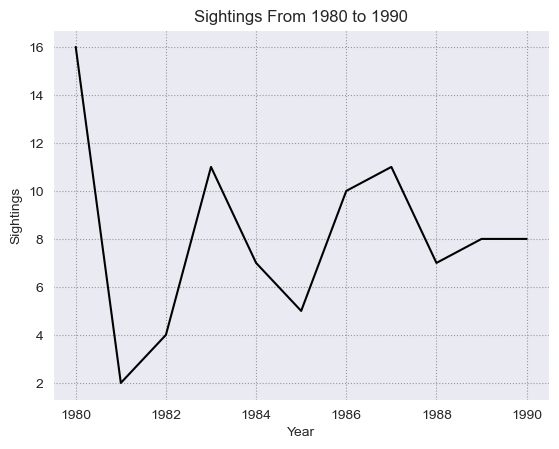

In [93]:
df_1980_1990 = df[(df['Year'] >= 1980) & (df['Year'] <= 1990)]
sightings_1980_1990 = df_1980_1990.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_1980_1990, x='Year', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Sightings From 1980 to 1990')
plt.show()

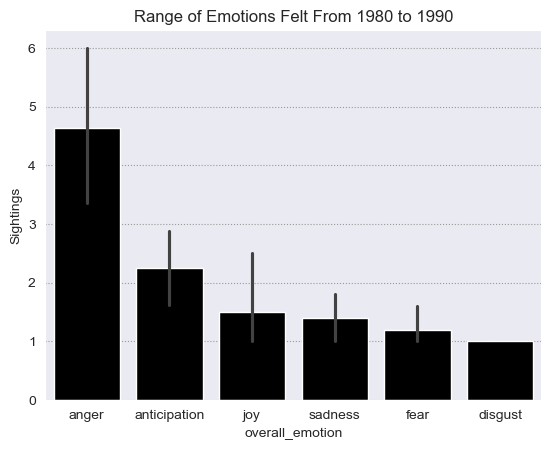

In [94]:
emotions = df_1980_1990.groupby(['Year', 'overall_emotion']).size().reset_index(name='Sightings').sort_values(by='Sightings', ascending=False)
sns.barplot(data=emotions, x='overall_emotion', y='Sightings', color='black', order=emotions['overall_emotion'])
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Range of Emotions Felt From 1980 to 1990')
plt.show()

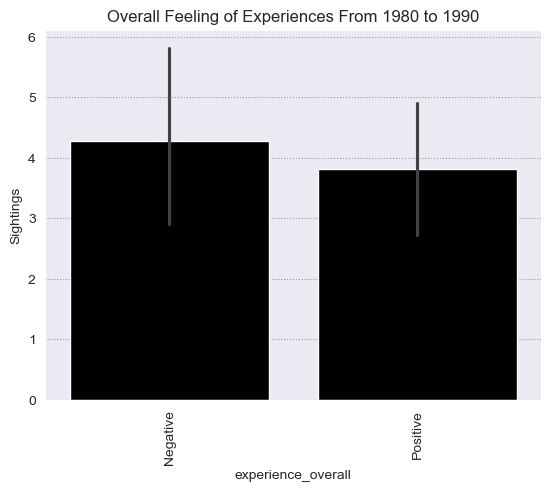

In [95]:
experience_graph = df_1980_1990.groupby(['Year', 'experience_overall']).size().reset_index(name='Sightings')
sns.barplot(data=experience_graph, x='experience_overall', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.xticks(rotation=90)
plt.title('Overall Feeling of Experiences From 1980 to 1990')
plt.show()

In [100]:
terms_1980_1990 = Dictionary(documents = df_1980_1990['Sighting_Tokenised'])
terms_1980_1990_dictionary = {}

#
for k, v in terms_1980_1990.cfs.items():
    if v > 1:
        terms_1980_1990_dictionary[terms_1980_1990[k]] = v

In [101]:
terms_1980_1990_dictionary

{'chased': 2,
 'round': 2,
 'flying': 9,
 'moved': 2,
 'high': 4,
 'speed': 6,
 'bright': 6,
 'near': 2,
 'viewed': 2,
 '15': 3,
 'minutes': 2,
 'slowly': 5,
 'moving': 5,
 'north': 2,
 'west': 2,
 'clear': 3,
 'night': 3,
 'noticed': 2,
 'thought': 2,
 'star': 3,
 'cigar': 4,
 'around': 6,
 'long': 3,
 '2': 4,
 'large': 3,
 'black': 8,
 'triangle': 6,
 'three': 4,
 'red': 6,
 '500': 2,
 'meters': 2,
 'big': 3,
 'small': 3,
 'close': 7,
 'sighting': 4,
 'uk': 4,
 'huge': 4,
 'green': 3,
 'ball': 5,
 'size': 3,
 'moon': 2,
 'travelling': 2,
 'low': 5,
 'fast': 2,
 '..': 2,
 'equilateral': 2,
 'triangular': 6,
 'shapes': 2,
 'formed': 2,
 'white': 2,
 'point': 2,
 'spinning': 2,
 'directly': 3,
 'us': 8,
 'sound': 5,
 'stopped': 2,
 'back': 4,
 'town': 3,
 'completely': 2,
 'silent': 4,
 "n't": 2,
 'would': 2,
 'whilst': 2,
 'outside': 2,
 'looked': 3,
 'flies': 2,
 'strange': 3,
 'brighton': 2,
 'beach': 2,
 'orange': 4,
 'gliding': 2,
 'shone': 2,
 'live': 2,
 'walking': 3,
 'humming':

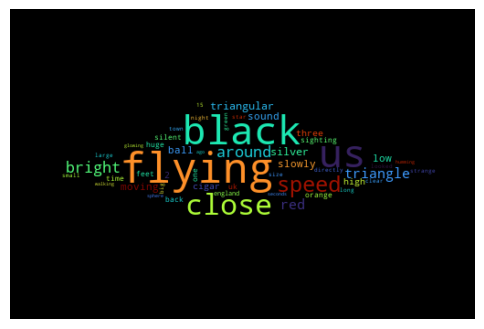

In [102]:
wc_1980_1990 = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(terms_1980_1990_dictionary)
plt.figure(figsize=(6,6))
plt.imshow(wc_1980_1990, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
# Top 10 sightings with lowest sentiment score from 1980 to 1990

top_sightings = df[(df['Year'] >= 1980) & (df['Year'] <= 1990)].nsmallest(10, 'sentiment_score')[['Year', 'City', 'Sighting', 'ufo_shapes']]
top_sightings

,Year,City,Sighting,ufo_shapes
5918,1990,Renfrew,"bright flourescent colour changing light seen near airport, viewed for 15 minutes slowly moving before departing",No shape described
5924,1990,HookHampshire,ufo sighting hook hampshire uk,No shape described
5925,1989,IverHeath,it looks like smoke no thats a ufo mate.1989.,No shape described
5927,1989,Leeds,it was near a raf base when i saw in the distance about 7 flying humanoids.,No shape described
5931,1989,London,"ufo's in enfield,middlesex",No shape described
5938,1988,UK/England,strange couple of objects,No shape described
5940,1987,Brighton,lights off brighton beach.,No shape described
5942,1987,Swansea,triangular lights seen over swansea and port talbot,No shape described
5945,1987,Widnes,"ok, i put this behind me, but in 1987 i was walking home from the pub, and i heard a low humming noise i turned and there was a silver",No shape described
5947,1987,Llandovery,fairy lights at speed and fold over ufo,No shape described


# 1990 to 2000

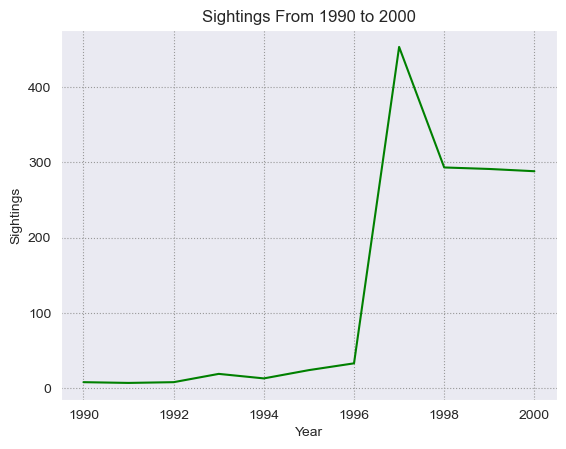

In [105]:
df_1990_2000 = df[(df['Year'] >= 1990) & (df['Year'] <= 2000)]
sightings_1990_2000 = df_1990_2000.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_1990_2000, x='Year', y='Sightings', color='green')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.title('Sightings From 1990 to 2000')
plt.show()

In [106]:
terms_1990_2000 = Dictionary(documents = df_1990_2000['Sighting_Tokenised'])
terms_1990_2000_dictionary = {}

#
for k, v in terms_1990_2000.cfs.items():
    if v > 5:
        terms_1990_2000_dictionary[terms_1990_2000[k]] = v

In [107]:
print(Counter(terms_1990_2000_dictionary).most_common(20))

[('one', 460), ('bright', 449), ('white', 339), ('moving', 245), ('red', 220), ('two', 182), ('moved', 162), ('large', 161), ('colour', 157), ('green', 132), ('star', 128), ('round', 125), ('orange', 114), ('fast', 113), ('blue', 103), ('flashing', 94), ('three', 90), ('triangular', 80), ('looked', 76), ('size', 75)]


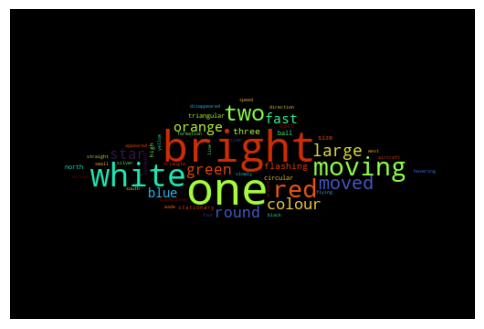

In [108]:
wc_1990_2000 = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(terms_1990_2000_dictionary)
plt.figure(figsize=(6,6))
plt.imshow(wc_1990_2000, interpolation="bilinear")
plt.axis("off")
plt.show()

In [113]:
# Top 10 sightings with smallest sentiment score from 1990 to 2000

top_sightings = df[(df['Year'] >= 1990) & (df['Year'] <= 2000)].nsmallest(10, 'sentiment_score')[['Year', 'Sighting', 'ufo_shapes']]
top_sightings

,Year,Sighting,ufo_shapes
16,1997,intermittent light was flashing red. then two flying objects were seen.,No shape described
17,1997,"two objects/lights that were parallel. were stationary for about 10 seconds. they moved away at speed, and then became brighter.",No shape described
24,1997,one object. was bright red/orange in colour. bright light. the object was moving downwards.,No shape described
35,1997,"orange, round object that was very bright. was high up and made a rapid downwards descent.",round
36,1997,mirror like object. it was flickering.,No shape described
46,1997,"a round, deep, red object. it was not lit up and didn't have any lights. it was moving from west to east and was very high. 4-5 times faster than an airliner.",round
48,1997,two objects that had one blue and one orange light. they were very bright. they were stationary and then there was erratic movement.,No shape described
66,1997,a round ball with a tail. was like a torch with a flare. there was no movement.,ball
72,1997,three lights. then there was a blue flash about 500ft up.,No shape described
86,1997,"one, round object. very bright. it was slow.",round


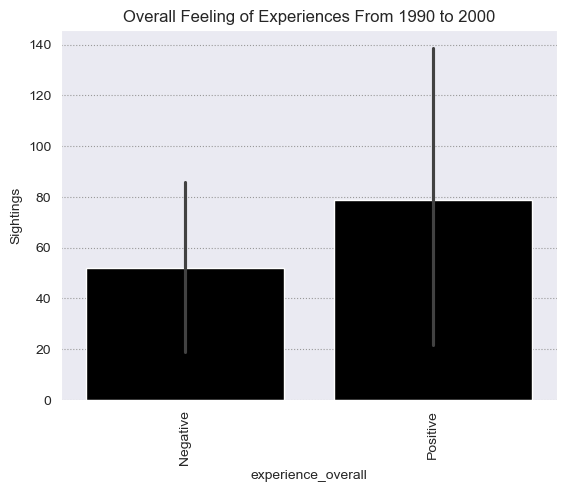

In [114]:
experience_graph_1990_2000 = df_1990_2000.groupby(['Year', 'experience_overall']).size().reset_index(name='Sightings')
sns.barplot(data=experience_graph_1990_2000, x='experience_overall', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.xticks(rotation=90)
plt.title('Overall Feeling of Experiences From 1990 to 2000')
plt.show()

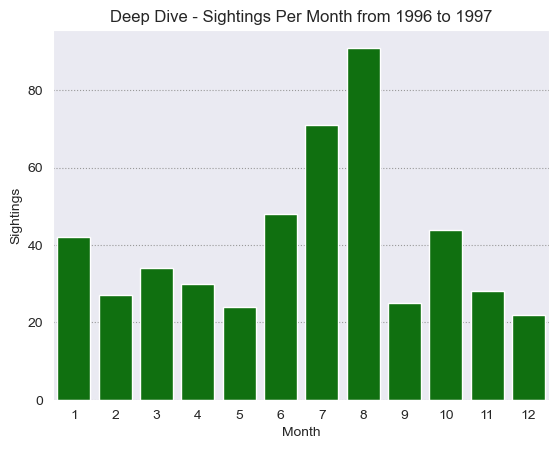

In [117]:
df_1996_1997 = df[(df['Year'] >= 1996) & (df['Year'] <= 1997)]
sightings_by_month_1990_2000 = df_1996_1997.groupby('Month').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1990_2000.nlargest(12, 'Sightings'), x='Month', y='Sightings', color='green')
plt.title('Deep Dive - Sightings Per Month from 1996 to 1997')
plt.show()

In [119]:
# Top 13 sightings with smallest sentiment score from 1996 to 1997, sorted by month in descending order

top_sightings_1996_1997 = df[(df['Year'] == 1996)].nsmallest(13, 'sentiment_score')[['Year', 'Month', 'City', 'Sighting', 'overall_emotion']].sort_values(by='Month', ascending = False)
top_sightings_1996_1997

,Year,Month,City,Sighting,overall_emotion
5814,1996,11,Wirral,three lights in formation.,anger
5816,1996,11,York,"fast travelling, in formation, rapid change of trajectory.",surprise
5817,1996,9,Oxford,scanned by something,anger
5819,1996,9,WestYorkshire,"hbccufo canadian report: the object fly slowly over us and behind a hillside, making further observation impossible.",anger
5818,1996,9,Norwich,"it was very simular to the one on your sight which was seen in kirkland. it was a clear night with plenty of stars about, and i wa",anticipation
5824,1996,8,Gloucester,"it shifted, and no known aircarft to do does turns, without braking to peaces.",anger
5827,1996,7,London,a simple pulsating light in an occean of blue,sadness
5830,1996,6,Scunthorpe,it was moving south towards london way,anger
5831,1996,6,Loanhead,"u.f.o (orange in colour) vanished from sight after 20-25 secs, spotted over midlothian, scotland, summer of 1996",surprise
5834,1996,6,Colne,non-aerodynamic movement of indeterminate object at high speed.,anger


# 2000 to 2010

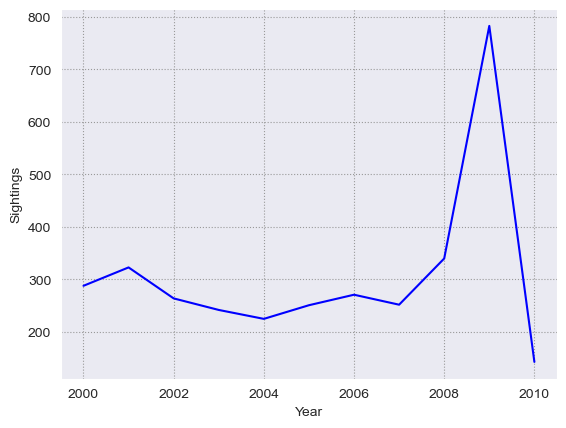

In [180]:
df_2000_2010 = df[(df['Year'] >= 2000) & (df['Year'] <= 2010)]
sightings_2000_2010 = df_2000_2010.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_2000_2010, x='Year', y='Sightings', color='blue')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

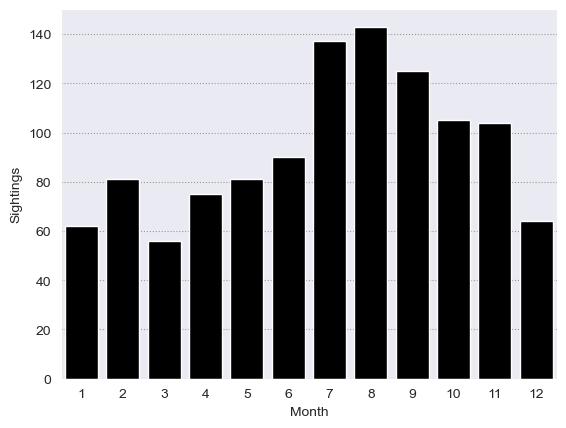

In [103]:
df_2000_2010 = df[(df['Year'] >= 2008) & (df['Year'] <= 2009)]
sightings_by_month_1990_2000 = df_2000_2010.groupby('Month').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1990_2000.nlargest(12, 'Sightings'), x='Month', y='Sightings', color='black')
plt.show()

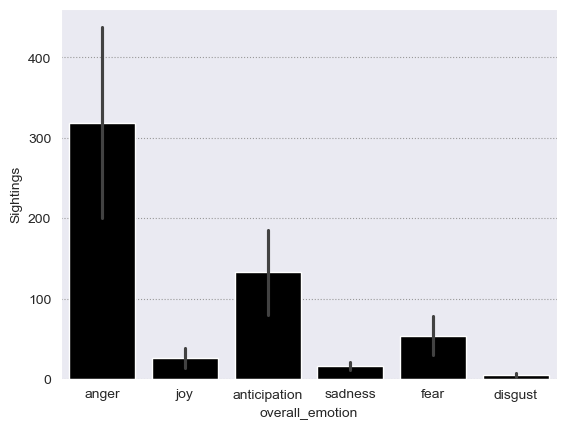

In [104]:
emotions_2000 = df_2000_2010.groupby(['Year', 'overall_emotion']).size().reset_index(name='Sightings').sort_values(by='Sightings', ascending=False)
sns.barplot(data=emotions_2000, x='overall_emotion', y='Sightings', color='black', order=emotions['overall_emotion'])
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

In [105]:
terms_2000_2010 = Dictionary(documents = df_2000_2010['Sighting_Tokenised'])
terms_2000_2010_dictionary = {}

#
for k, v in terms_2000_2010.cfs.items():
    if v > 5:
        terms_2000_2010_dictionary[terms_2000_2010[k]] = v

In [106]:
print(Counter(terms_2000_2010_dictionary).most_common(20))

[('orange', 395), ('bright', 310), ('moving', 171), ('two', 149), ('red', 128), ('one', 110), ('sound', 90), ('three', 89), ('disappeared', 86), ('moved', 81), ('white', 81), ('ball', 80), ('travelling', 78), ('noise', 72), ('minutes', 69), ('speed', 68), ('large', 67), ('across', 62), ('formation', 62), ('flying', 61)]


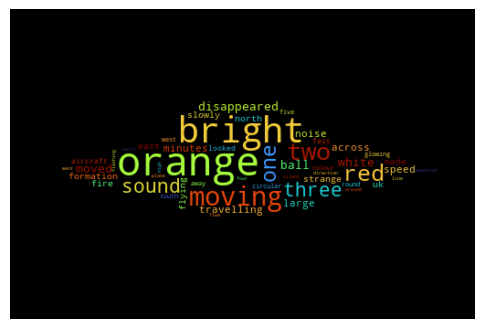

In [107]:
wc_2000_2010 = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(terms_2000_2010_dictionary)
plt.figure(figsize=(6,6))
plt.imshow(wc_2000_2010, interpolation="bilinear")
plt.axis("off")
plt.show()

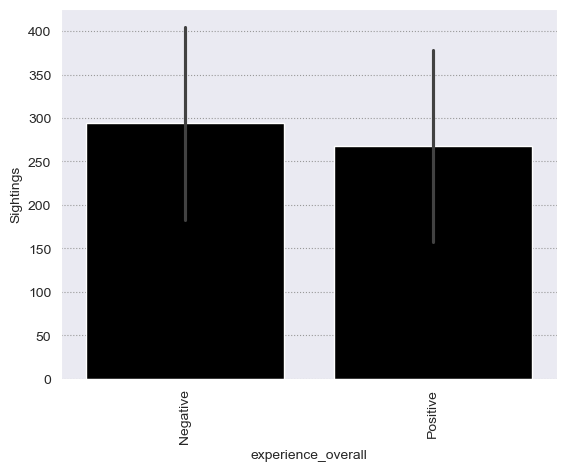

In [108]:
experience_graph_2000_2010 = df_2000_2010.groupby(['Year', 'experience_overall']).size().reset_index(name='Sightings')
sns.barplot(data=experience_graph_2000_2010, x='experience_overall', y='Sightings', color='black')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.xticks(rotation=90)
plt.show()

In [109]:
# df.City

In [172]:
top_sightings_2000_2010 = df[(df['Year'] >= 2008) & (df['Year'] < 2009) & (df.index == 1858) & (df.index == 1854) & (df.index == 1793)& (df.index == 1768)& (df.index == 1704)& (df.index == 1831)& (df.index == 1842)& (df.index == 1842)& (df.index == 1842)& (df.index == 1842)].nsmallest(40, 'sentiment_score')[['Year', 'Month', 'City', 'Sighting', 'experience_overall']].sort_values(by='Month', ascending = False)
top_sightings_2000_2010['Sighting'].replace('\\', '')
top_sightings_2000_2010

,Year,Month,City,Sighting,experience_overall


In [174]:
top_sightings_2000_2010 = df[(df['Year'] >= 2008) & (df['Year'] < 2009)].nsmallest(80, 'sentiment_score')[['Year', 'Month', 'City', 'Sighting', 'experience_overall']].sort_values(by='Month', ascending = False)
top_sightings_2000_2010['Sighting'].replace('\\', '')
top_sightings_2000_2010

,Year,Month,City,Sighting,experience_overall
4160,2008,12,Gloucestershire,4 orange spherical objects seen in around 2 minute intervals ont he same path,Negative
4159,2008,12,Reading,2 orange balls of light like a plane was on fire,Negative
4157,2008,12,Harrogate,3 orange lights passing over harrogate uk.,Negative
4156,2008,12,Birmingham,sighting of spinning lights near birmingham uk . 28/12/08 about 7:30pm on the motorway.,Negative
4154,2008,12,London,ufo lights seen,Negative
1867,2008,12,Loughton/Adbridge,lights in groups of 3 or 4 but not in a line. they weere an orange/yellow colour. watched for 30 minutes. they made no sound,Negative
1858,2008,12,Glasgow,"six objects in two lines of three, one line above the other. emitted a very strong yellow orange light before disappearing in the\ndistance to the west.",Negative
1854,2008,12,Rottingdean,there were fifteen ufos/bright lights coming\ndown from the downs. they were travelling at very fast speeds.,Negative
4169,2008,12,Ely,"ufos photographed xmas eve near ely carthedral, cambridge, england",Negative
4161,2008,12,St.Andrews,two bright lights in fife,Negative


# 2010 to 2020

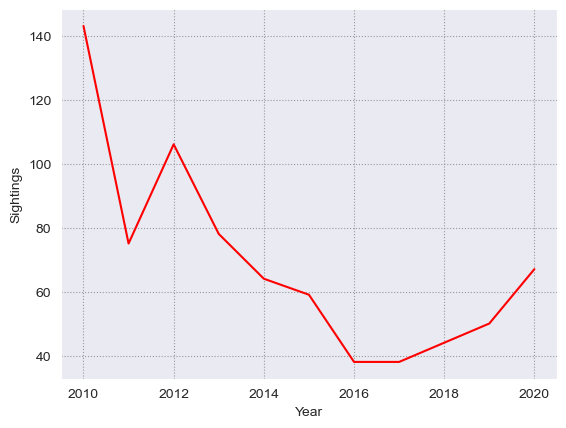

In [181]:
df_2010_2020 = df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]
sightings_2010_2020 = df_2010_2020.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_2010_2020, x='Year', y='Sightings', color='red')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

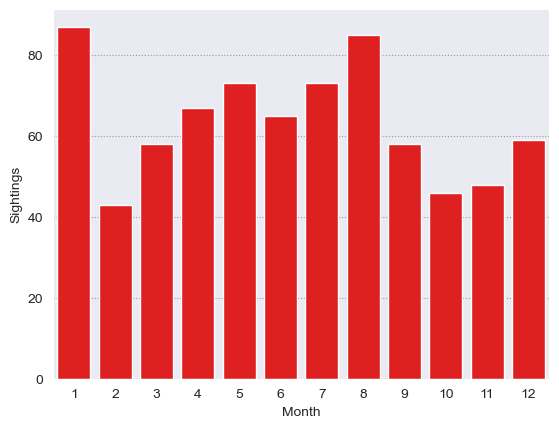

In [182]:
df_2010_2020 = df[(df['Year'] >= 2010) & (df['Year'] <= 2020)]
sightings_by_month_1990_2000 = df_2010_2020.groupby('Month').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1990_2000.nlargest(12, 'Sightings'), x='Month', y='Sightings', color='red')
plt.show()

In [113]:
top_sightings_2000_2010 = df[(df['Year'] >= 2016) & (df['Year'] <= 2019) &(df.index != 3205)].nlargest(12, 'sentiment_score')[['Year', 'Sighting']].sort_values(by='Year', ascending = False)
top_sightings_2000_2010['Sighting'].replace('\\', '')
top_sightings_2000_2010

,Year,Sighting
3199,2019,3 objects with white glow
3213,2019,cigar shape craft crashing.
3216,2019,small house sized craft with green lights
3197,2019,weird looking shape in the sky that disappeared suddenly
3246,2018,diamond shape orb contacting me
3233,2018,triangular shape in the sky with blue lights
3302,2017,2 green orbs
3293,2017,white orb disappeared slowly
3347,2016,bright white light
3315,2016,white light moving slowly in the morning sky


In [114]:
top_sightings_1996_1997 = df[(df['Year'] >= 2010) & (df['Year'] <= 2020) & (df['City'] == 'Wales')].nlargest(13, 'sentiment_score')[['Year', 'Month', 'City', 'Sighting', 'overall_emotion']].sort_values(by='Month', ascending = False)
top_sightings_1996_1997

,Year,Month,City,Sighting,overall_emotion


In [115]:
terms_2010_2020 = Dictionary(documents = df_2010_2020['Sighting_Tokenised'])
terms_2010_2020_dictionary = {}

#
for k, v in terms_2010_2020.cfs.items():
    if v > 5:
        terms_2010_2020_dictionary[terms_2010_2020[k]] = v

In [116]:
print(Counter(terms_2010_2020_dictionary).most_common(20))

[('moving', 126), ('bright', 124), ('orange', 104), ('white', 91), ('red', 75), ('across', 56), ('two', 49), ('uk', 47), ('flying', 47), ('night', 43), ('fast', 40), ('formation', 39), ('line', 38), ('star', 34), ('large', 34), ('nuforc', 33), ('note', 33), ('pd', 33), ('orb', 31), ('ball', 30)]


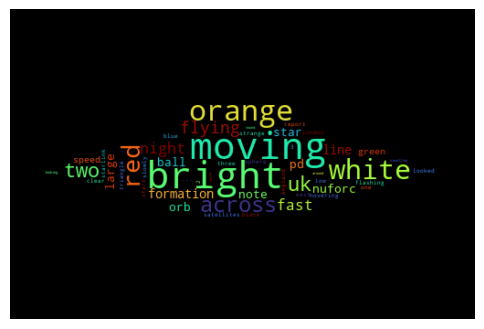

In [117]:
wc_2010_2020 = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(terms_2010_2020_dictionary)
plt.figure(figsize=(6,6))
plt.imshow(wc_2010_2020, interpolation="bilinear")
plt.axis("off")
plt.show()

# 2020 to 2025

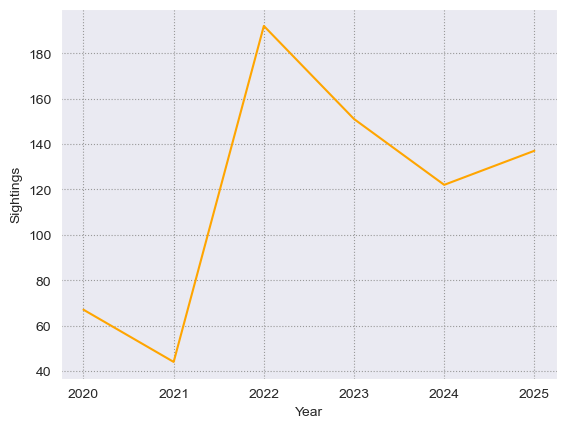

In [188]:
df_2020_2025 = df[(df['Year'] >= 2020) & (df['Year'] <= 2025)]
sightings_2020_2025 = df_2020_2025.groupby('Year').size().reset_index(name='Sightings')
sns.lineplot(data=sightings_2020_2025, x='Year', y='Sightings', color='orange')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.show()

In [119]:
terms_2020_2025 = Dictionary(documents = df_2020_2025['Sighting_Tokenised'])
terms_2020_2025_dictionary = {}

#
for k, v in terms_2020_2025.cfs.items():
    if v > 5:
        terms_2020_2025_dictionary[terms_2020_2025[k]] = v

In [120]:
print(Counter(terms_2020_2025_dictionary).most_common(20))

[('moving', 137), ('bright', 122), ('white', 92), ('flying', 64), ('fast', 56), ('2', 54), ('looked', 50), ('orb', 45), ('across', 39), ('flashing', 37), ('high', 35), ('two', 35), ('red', 34), ('speed', 33), ('one', 33), ('moved', 31), ('3', 31), ('star', 30), ('green', 30), ('large', 28)]


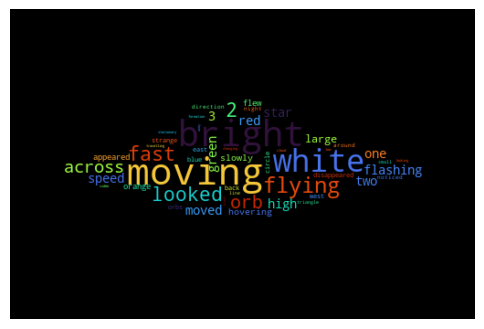

In [121]:
wc_2020_2025 = WordCloud(colormap='turbo', width=800, height=400, max_words=50, mask=ufo_mask).generate_from_frequencies(terms_2020_2025_dictionary)
plt.figure(figsize=(6,6))
plt.imshow(wc_2020_2025, interpolation="bilinear")
plt.axis("off")
plt.show()

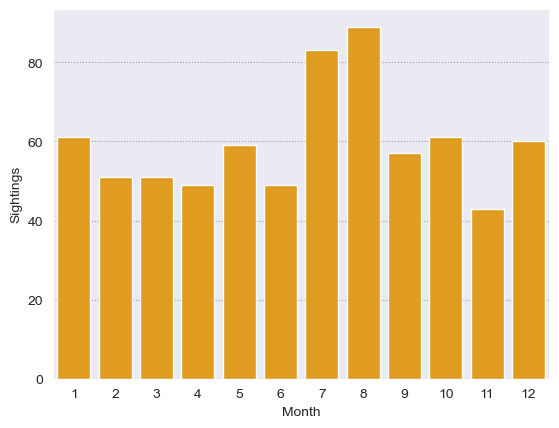

In [185]:
df_2010_2020 = df[(df['Year'] >= 2020) & (df['Year'] <= 2025)]
sightings_by_month_1990_2000 = df_2010_2020.groupby('Month').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1990_2000.nlargest(12, 'Sightings'), x='Month', y='Sightings', color='orange')
plt.show()

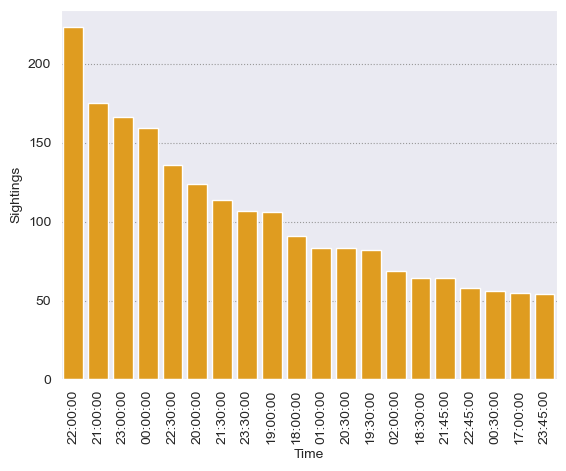

In [186]:
sightings_by_month_1990_2000 = df.groupby('Time').size().reset_index(name='Sightings')
sns.barplot(data=sightings_by_month_1990_2000.nlargest(20, 'Sightings'), x='Time', y='Sightings', color='orange')
plt.xticks(rotation=90)
plt.show()

In [137]:
df_abductions = df[df['City'].notna()]

In [142]:
len(df_abductions)

5877

In [155]:
abductions = df_abductions.groupby('City')[['City', 'Year']]

In [156]:
abductions

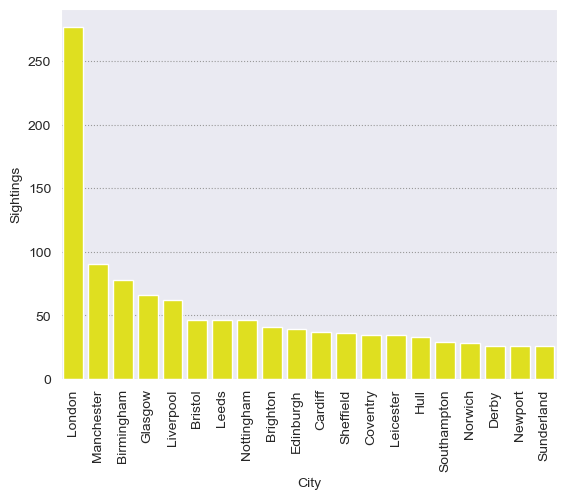

In [191]:
abductionsdf = df_abductions.groupby(['City']).size().reset_index(name='Sightings')
sns.barplot(data=abductionsdf.nlargest(20, 'Sightings'), x='City', y='Sightings', color='yellow')
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})
plt.xticks(rotation=90)

plt.show()

In [187]:
# abductionsdf.Sightings.value